Project: Student Result Analysis Using K-means and Fuzzy C-means

dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Algorithms: KMeans, Fuzzy C-Means

Inspiration: To understand the influence of the parents background, test preparation, etc on students performance

Main Steps:
1. Data preprocessing
2. Outlier Detection
3. Basic Analysis
4. Apply KMeans and visualize results
5. Apply Fuzzy C-means and visualize results
6. Performance Evaluation
7. Conclusion, represent knowledge

In [91]:
import seaborn as sns  # Visualize data
import matplotlib.pyplot as plt
import os
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Preprocessing, 
from sklearn.cluster import KMeans
import plotly.express as px
import random
import operator
import math

In [92]:
# Read student data from csv file
df = pd.read_csv('StudentsPerformance.csv')

In [93]:
# Check data by displaying data head 
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [94]:
# Check data by displaying data tail 
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Data is read perfectly!!! Start data pre-processing!

In [95]:
# Generate descriptive statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [96]:
# Check data type of cols
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [97]:
# Check if data has missing values
df.isna().sum()
# No missing values
# if there are, run this to delete all rows that contain empty cells

#df = df.dropna(inplace=True)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [98]:
# Check duplicated rows
df.duplicated().sum()

# No duplicated rows

0

We should rename all attributes as they are long

In [99]:
# Rename cols
df.rename(columns={"race/ethnicity": "race", 
                  "parental level of education": "parent_education",
                  "math score": "math", 
                  "reading score": "reading", 
                  "writing score": "writing", 
                  "test preparation course": "test_preparation"}
                  , inplace=True)
# Show dataframe after renaming
df.head(10)


,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Check whether this dataset has outliers
Clustering algorithms are very sensitive with outliers
We use Std deviation to detect outliers
We define a function named outlier_dectection

In [100]:
# Define an outlier check function
def outlier_dectection (df, column):
   data_mean, data_std = df[column].mean(), df[column].std()
   cut_off = data_std * 3
   lower, upper = data_mean - cut_off, data_mean + cut_off
   print('The lower bound value is', lower)
   print('The upper bound value is', upper)
   df1 = df[df[column] > upper]
   df2 = df[df[column] < lower]
   print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
   plt.figure(figsize = (10,5))
   sns.histplot(df[column], kde=False)
   plt.axvspan(xmin = lower,xmax= df[column].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= df[column].max(),alpha=0.2, color='red')
   return lower, upper

The lower bound value is 20.59975971197165
The upper bound value is 111.57824028802835
Total number of outliers are 4


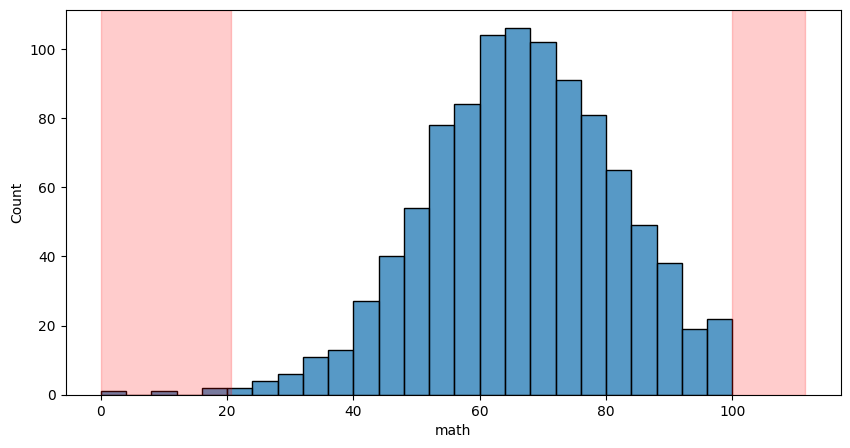

In [101]:
# Check outliers in math col
lower, upper = outlier_dectection(df, 'math')

# Remove outliers
df = df[(df['math'] < upper) & (df['math'] > lower)]

The lower bound value is 26.189102205790704
The upper bound value is 112.48158052513298
Total number of outliers are 3


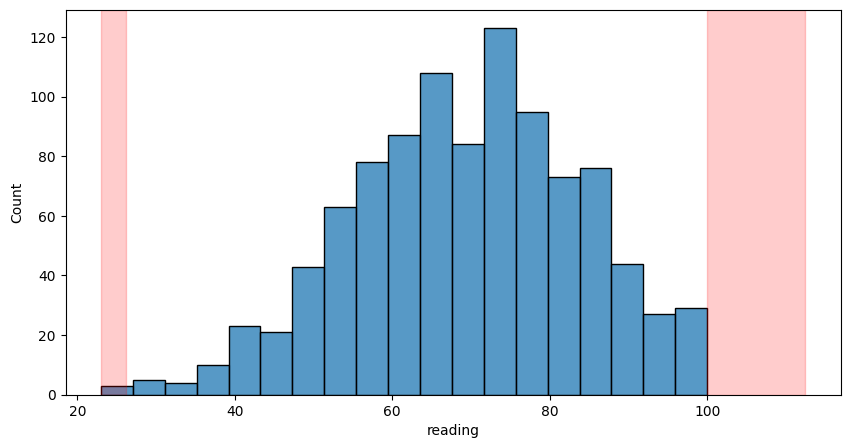

In [102]:
# Check outliers in reading col
lower, upper = outlier_dectection(df, 'reading')

# Remove outliers
df = df[(df['reading'] < upper) & (df['reading'] > lower)]

The lower bound value is 24.225961923417813
The upper bound value is 112.54140967779064
Total number of outliers are 0


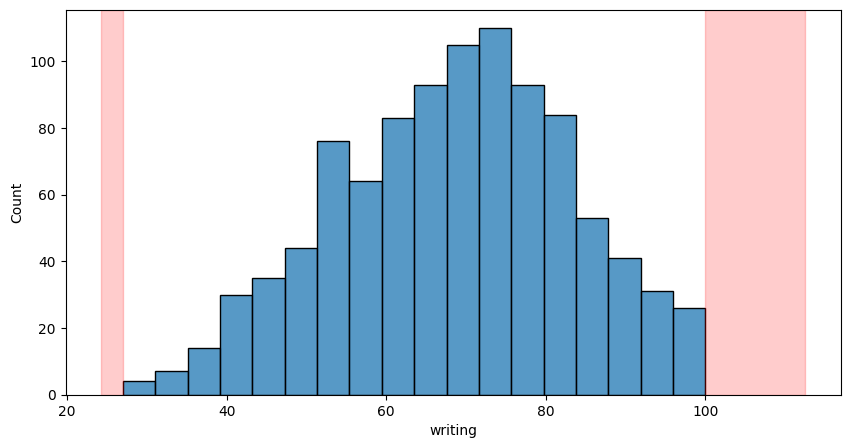

In [103]:
# Check outliers in writing col
lower, upper = outlier_dectection(df, 'writing')

# Remove outliers
df = df[(df['writing'] < upper) & (df['writing'] > lower)]